In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train['ImputedAge'] = train['Age'].fillna(train['Age'].median())
train.head()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
ImputedAge       0
dtype: int64

In [7]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'
    
train['Title'] = train['Name'].map(lambda x: get_title(x))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ImputedAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,Mr


In [8]:
train.drop(['Age', 'Cabin'], axis = 1, inplace = True)
train.dropna(inplace = True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
ImputedAge     0
Title          0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
y = train['Survived']
#keep = ['Sex', 'Pclass', 'Title', 'ImputedAge', 'SibSp', 'Parch', 'Fare']
keep = ['Sex', 'Pclass', 'Title', 'ImputedAge', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[keep]
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing

In [11]:
model = LogisticRegression()

In [12]:
X_train.describe()

,Pclass,ImputedAge,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Don,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.0,595.000000,595.0,...,595.0,595.000000,595.000000,595.0,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,2.327731,29.623681,0.542857,0.398319,32.768361,0.339496,0.660504,0.0,0.001681,0.0,...,0.0,0.591597,0.141176,0.0,0.005042,0.001681,0.001681,0.184874,0.089076,0.726050
std,0.829884,13.249440,1.109841,0.829383,51.513876,0.473937,0.473937,0.0,0.040996,0.0,...,0.0,0.491952,0.348496,0.0,0.070888,0.040996,0.040996,0.388522,0.285093,0.446359
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.500000,0.000000,0.000000,7.895800,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000,1.000000,0.0,0.000000,0.0,...,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,36.000000,1.000000,0.000000,30.847900,1.000000,1.000000,0.0,0.000000,0.0,...,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,0.0,1.000000,0.0,...,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
model.score(X_test, y_test)

0.8231292517006803

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(model, X, y, cv = 5)
print(scores)
print(np.mean(scores))


[ 0.83707865  0.81460674  0.80337079  0.79213483  0.85310734]
0.820059671174


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Set the parameters by cross-validation
tuned_parameters = [{'penalty': ['l1', 'l2'], 'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]}]

scores = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'penalty': 'l2', 'C': 0.01}

Grid scores on development set:

0.634 (+/-0.170) for {'penalty': 'l1', 'C': 0.01}
0.849 (+/-0.105) for {'penalty': 'l2', 'C': 0.01}
0.773 (+/-0.257) for {'penalty': 'l1', 'C': 0.03}
0.765 (+/-0.048) for {'penalty': 'l2', 'C': 0.03}
0.747 (+/-0.039) for {'penalty': 'l1', 'C': 0.1}
0.769 (+/-0.046) for {'penalty': 'l2', 'C': 0.1}
0.775 (+/-0.028) for {'penalty': 'l1', 'C': 0.3}
0.796 (+/-0.041) for {'penalty': 'l2', 'C': 0.3}
0.804 (+/-0.045) for {'penalty': 'l1', 'C': 1}
0.796 (+/-0.050) for {'penalty': 'l2', 'C': 1}
0.794 (+/-0.049) for {'penalty': 'l1', 'C': 3}
0.792 (+/-0.054) for {'penalty': 'l2', 'C': 3}
0.788 (+/-0.055) for {'penalty': 'l1', 'C': 10}
0.791 (+/-0.052) for {'penalty': 'l2', 'C': 10}
0.792 (+/-0.064) for {'penalty': 'l1', 'C': 30}
0.781 (+/-0.062) for {'penalty': 'l2', 'C': 30}
0.792 (+/-0.064) for {'penalty': 'l1', 'C': 100}
0.788 (+/-0.055) for {'p

In [17]:
clf.best_params_

{'C': 3, 'penalty': 'l2'}

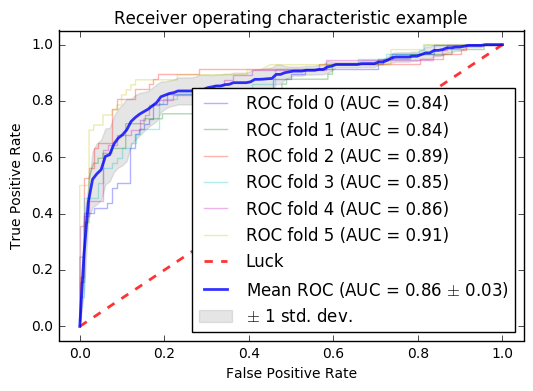

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
cv = StratifiedKFold(n_splits=6)
classifier = LogisticRegression(**clf.best_params_)
X = X.as_matrix()
y = y.as_matrix()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    #print(X[train])
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.svm import SVC
def run_steps(X, y, model_f, tuned_parameters):
    model = model_f()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    print("Score on test using default settings: ", model.score(X_test, y_test))
    scores = cross_val_score(model, X, y, cv = 5)
    print("Scores for 5 fold CV: ", scores)
    print("Mean score for 5 fold CV: ", np.mean(scores))
    
    #tuned_parameters = [{'penalty': ['l1', 'l2'], 'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]}]

    scores = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
    #scores = ['recall', 'accuracy', 'f1', 'roc_auc']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(model, tuned_parameters, cv=5,
                       scoring=score)
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        
    print("Best settings for ", scores[-1], ":", clf.best_params_)
    
    cv = StratifiedKFold(n_splits=6)
    if (model_f == SVC):
        classifier = model_f(**clf.best_params_, probability = True)
    else:
        classifier = model_f(**clf.best_params_)
    #X = X.as_matrix()
    #y = y.as_matrix()

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        #print(X[train])
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

Score on test using default settings:  0.823129251701
Scores for 5 fold CV:  [ 0.83707865  0.81460674  0.80337079  0.79213483  0.85310734]
Mean score for 5 fold CV:  0.820059671174
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'penalty': 'l2', 'C': 0.01}

Grid scores on development set:

0.634 (+/-0.170) for {'penalty': 'l1', 'C': 0.01}
0.849 (+/-0.105) for {'penalty': 'l2', 'C': 0.01}
0.773 (+/-0.257) for {'penalty': 'l1', 'C': 0.03}
0.765 (+/-0.048) for {'penalty': 'l2', 'C': 0.03}
0.747 (+/-0.039) for {'penalty': 'l1', 'C': 0.1}
0.769 (+/-0.046) for {'penalty': 'l2', 'C': 0.1}
0.775 (+/-0.028) for {'penalty': 'l1', 'C': 0.3}
0.796 (+/-0.041) for {'penalty': 'l2', 'C': 0.3}
0.804 (+/-0.045) for {'penalty': 'l1', 'C': 1}
0.796 (+/-0.050) for {'penalty': 'l2', 'C': 1}
0.794 (+/-0.049) for {'penalty': 'l1', 'C': 3}
0.792 (+/-0.054) for {'penalty': 'l2', 'C': 3}
0.788 (+/-0.055) for {'penalty': 'l1', 'C': 10}
0.791 (+/-0.052) for {'penalty': 'l2

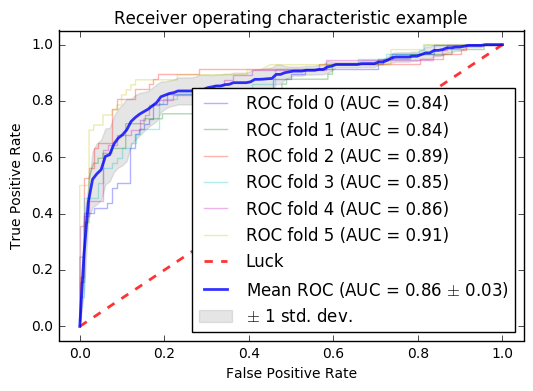

In [44]:
model = LogisticRegression
tuned_parameters = [{'penalty': ['l1', 'l2'], 'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]}]
run_steps(X, y, model, tuned_parameters)

Score on test using default settings:  0.710884353741
Scores for 5 fold CV:  [ 0.67977528  0.7247191   0.75280899  0.73033708  0.73446328]
Mean score for 5 fold CV:  0.724420745255
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'metric': 'manhattan', 'n_neighbors': 2}

Grid scores on development set:

0.636 (+/-0.130) for {'metric': 'euclidean', 'n_neighbors': 1}
0.731 (+/-0.062) for {'metric': 'euclidean', 'n_neighbors': 2}
0.661 (+/-0.097) for {'metric': 'euclidean', 'n_neighbors': 3}
0.680 (+/-0.107) for {'metric': 'euclidean', 'n_neighbors': 4}
0.648 (+/-0.114) for {'metric': 'euclidean', 'n_neighbors': 5}
0.670 (+/-0.123) for {'metric': 'euclidean', 'n_neighbors': 6}
0.619 (+/-0.216) for {'metric': 'euclidean', 'n_neighbors': 7}
0.643 (+/-0.145) for {'metric': 'euclidean', 'n_neighbors': 8}
0.635 (+/-0.148) for {'metric': 'euclidean', 'n_neighbors': 9}
0.662 (+/-0.175) for {'metric': 'euclidean', 'n_neighbors': 10}
0.687 (+/-0.110) for {'m

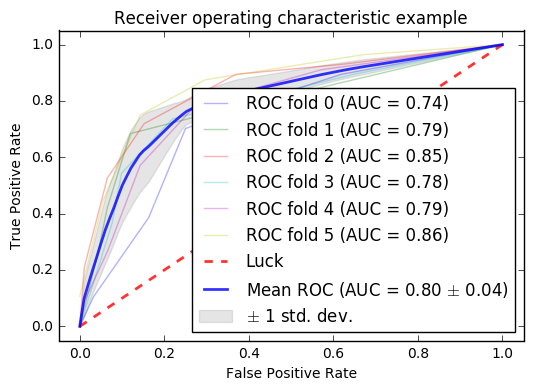

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier
tuned_parameters = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'metric': ['euclidean', 'manhattan', 'chebyshev']}]
run_steps(X, y, model, tuned_parameters)

Score on test using default settings:  0.748299319728
Scores for 5 fold CV:  [ 0.6741573   0.73595506  0.73595506  0.76404494  0.76271186]
Mean score for 5 fold CV:  0.734564844791
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'linear', 'C': 1}

Grid scores on development set:

0.764 (+/-0.031) for {'kernel': 'linear', 'C': 0.03}
0.784 (+/-0.030) for {'kernel': 'linear', 'C': 0.1}
0.786 (+/-0.035) for {'kernel': 'linear', 'C': 0.3}
0.787 (+/-0.026) for {'kernel': 'linear', 'C': 1}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.85      0.85      0.85       184
          1       0.75      0.75      0.75       110

avg / total       0.82      0.82      0.82       294


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'kernel': 'linear', 'C

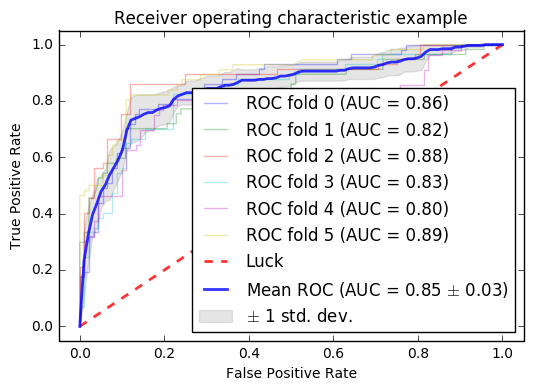

In [41]:
from sklearn.svm import SVC
model = SVC
tuned_parameters = [{'kernel': ['linear'], 'C': [0.03, 0.1, 0.3, 1]}]
run_steps(X, y, model, tuned_parameters)

Score on test using default settings:  0.697278911565
Scores for 5 fold CV:  [ 0.71348315  0.71348315  0.76404494  0.74719101  0.73446328]
Mean score for 5 fold CV:  0.734533104805
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_restarts_optimizer': 1}

Grid scores on development set:

0.675 (+/-0.066) for {'n_restarts_optimizer': 1}
0.675 (+/-0.066) for {'n_restarts_optimizer': 2}
0.675 (+/-0.066) for {'n_restarts_optimizer': 3}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.74      0.80      0.77       184
          1       0.61      0.52      0.56       110

avg / total       0.69      0.70      0.69       294


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'n_restarts_optimizer': 1}

Grid scores on development set:

0.574 (+/-0.136) for {

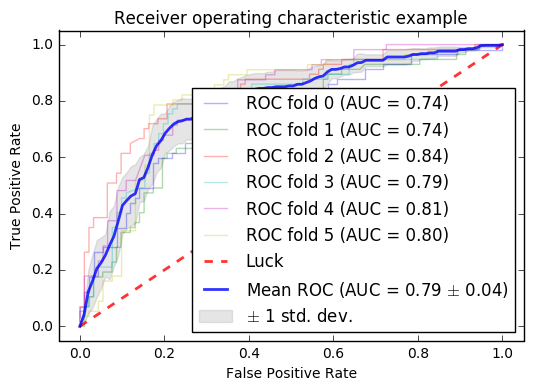

In [45]:
from sklearn.gaussian_process import GaussianProcessClassifier
model = GaussianProcessClassifier
tuned_parameters = [{'n_restarts_optimizer': [1, 2, 3]}]
run_steps(X, y, model, tuned_parameters)

Score on test using default settings:  0.741496598639
Scores for 5 fold CV:  [ 0.7752809   0.75280899  0.83707865  0.71910112  0.78531073]
Mean score for 5 fold CV:  0.773916079477
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'max_depth': 2, 'criterion': 'gini', 'splitter': 'best'}

Grid scores on development set:

0.710 (+/-0.059) for {'max_depth': 1, 'criterion': 'gini', 'splitter': 'best'}
0.710 (+/-0.059) for {'max_depth': 1, 'criterion': 'gini', 'splitter': 'random'}
0.870 (+/-0.240) for {'max_depth': 2, 'criterion': 'gini', 'splitter': 'best'}
0.737 (+/-0.118) for {'max_depth': 2, 'criterion': 'gini', 'splitter': 'random'}
0.775 (+/-0.087) for {'max_depth': 3, 'criterion': 'gini', 'splitter': 'best'}
0.845 (+/-0.146) for {'max_depth': 3, 'criterion': 'gini', 'splitter': 'random'}
0.803 (+/-0.138) for {'max_depth': 4, 'criterion': 'gini', 'splitter': 'best'}
0.827 (+/-0.108) for {'max_depth': 4, 'criterion': 'gini', 'splitter': 'random'}

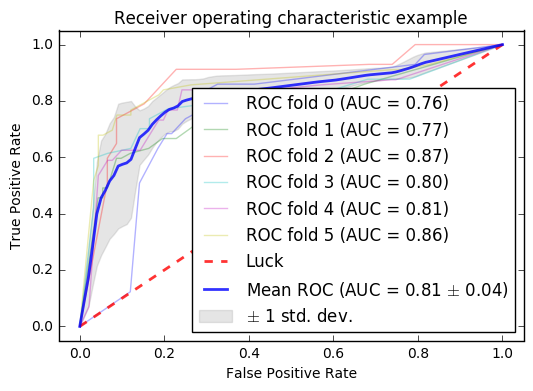

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier
tuned_parameters = [{'criterion': ['gini', 'entropy'], 
                     'splitter': ['best', 'random'], 
                     'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
run_steps(X, y, model, tuned_parameters)

Score on test using default settings:  0.789115646259
Scores for 5 fold CV:  [ 0.80898876  0.80898876  0.84269663  0.75280899  0.83615819]
Mean score for 5 fold CV:  0.809928267632
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_estimators': 30, 'criterion': 'entropy', 'max_depth': 7}

Grid scores on development set:

0.768 (+/-0.090) for {'n_estimators': 10, 'criterion': 'gini', 'max_depth': 1}
0.749 (+/-0.022) for {'n_estimators': 20, 'criterion': 'gini', 'max_depth': 1}
0.750 (+/-0.013) for {'n_estimators': 30, 'criterion': 'gini', 'max_depth': 1}
0.756 (+/-0.015) for {'n_estimators': 10, 'criterion': 'gini', 'max_depth': 2}
0.749 (+/-0.038) for {'n_estimators': 20, 'criterion': 'gini', 'max_depth': 2}
0.749 (+/-0.013) for {'n_estimators': 30, 'criterion': 'gini', 'max_depth': 2}
0.792 (+/-0.072) for {'n_estimators': 10, 'criterion': 'gini', 'max_depth': 3}
0.792 (+/-0.056) for {'n_estimators': 20, 'criterion': 'gini', 'max_depth': 3}
0.78

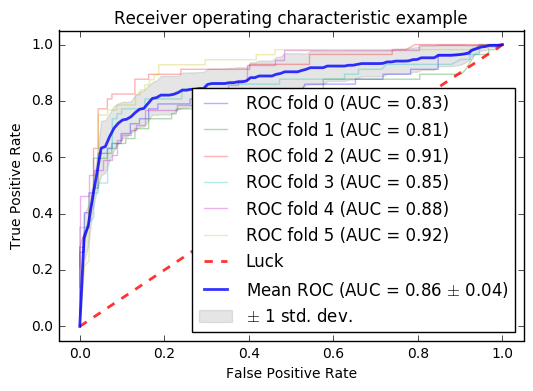

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier
tuned_parameters = [{'n_estimators': [10, 20, 30],
                     'criterion': ['gini', 'entropy'], 
                     'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}]
run_steps(X, y, model, tuned_parameters)

Score on test using default settings:  0.765306122449
Scores for 5 fold CV:  [ 0.79775281  0.75842697  0.83707865  0.76966292  0.77966102]
Mean score for 5 fold CV:  0.788516473053
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_estimators': 30, 'criterion': 'entropy', 'max_depth': 8}

Grid scores on development set:

0.769 (+/-0.058) for {'n_estimators': 10, 'criterion': 'gini', 'max_depth': 1}
0.778 (+/-0.119) for {'n_estimators': 20, 'criterion': 'gini', 'max_depth': 1}
0.748 (+/-0.006) for {'n_estimators': 30, 'criterion': 'gini', 'max_depth': 1}
0.748 (+/-0.006) for {'n_estimators': 10, 'criterion': 'gini', 'max_depth': 2}
0.748 (+/-0.006) for {'n_estimators': 20, 'criterion': 'gini', 'max_depth': 2}
0.750 (+/-0.008) for {'n_estimators': 30, 'criterion': 'gini', 'max_depth': 2}
0.766 (+/-0.030) for {'n_estimators': 10, 'criterion': 'gini', 'max_depth': 3}
0.777 (+/-0.062) for {'n_estimators': 20, 'criterion': 'gini', 'max_depth': 3}
0.75

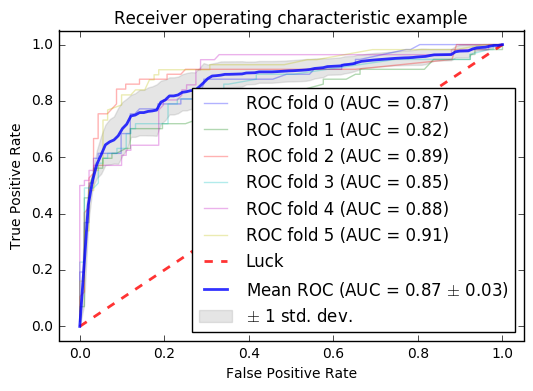

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier
tuned_parameters = [{'n_estimators': [10, 20, 30],
                     'criterion': ['gini', 'entropy'], 
                     'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}]
run_steps(X, y, model, tuned_parameters)

Score on test using default settings:  0.608843537415
Scores for 5 fold CV:  [ 0.7752809   0.81460674  0.71348315  0.71910112  0.72316384]
Mean score for 5 fold CV:  0.749127150384
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'solver': 'lbfgs', 'hidden_layer_sizes': (10,), 'activation': 'logistic', 'alpha': 0.0001}

Grid scores on development set:

0.788 (+/-0.071) for {'solver': 'lbfgs', 'hidden_layer_sizes': (10,), 'activation': 'identity', 'alpha': 0.001}
0.783 (+/-0.074) for {'solver': 'lbfgs', 'hidden_layer_sizes': (100,), 'activation': 'identity', 'alpha': 0.001}
0.790 (+/-0.048) for {'solver': 'lbfgs', 'hidden_layer_sizes': (10, 10), 'activation': 'identity', 'alpha': 0.001}
0.788 (+/-0.078) for {'solver': 'lbfgs', 'hidden_layer_sizes': (100, 100), 'activation': 'identity', 'alpha': 0.001}
0.783 (+/-0.061) for {'solver': 'lbfgs', 'hidden_layer_sizes': (10,), 'activation': 'identity', 'alpha': 0.0001}
0.782 (+/-0.076) for {'solver': 'lb

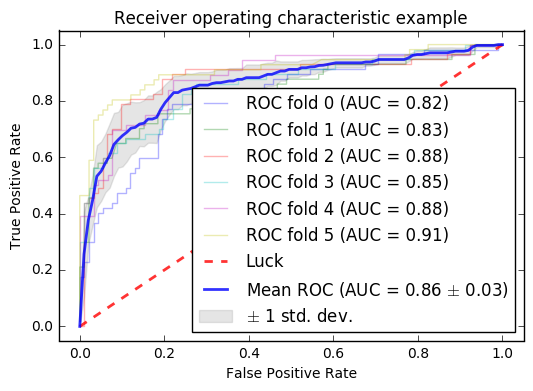

In [28]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier
tuned_parameters = [{'hidden_layer_sizes': [(10,), (100,), (10,10), (100,100)],
                     'activation': ['identity', 'logistic', 'tanh', 'relu'], 
                     'alpha': [1e-3, 1e-4, 1e-5], 
                    'solver': ['lbfgs']}]
run_steps(X, y, model, tuned_parameters)

In [668]:
test = pd.read_csv('test.csv')

In [669]:
X = test[keep]
X = pd.get_dummies(X)
model.predict(X)

KeyError: "['Title' 'ImputedAge'] not in index"